## <p style="text-align: right;"> &#9989; Maria Faraj</p>

# CMSE 202 Final (Section 001 - Fall 2023)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents), you will be at risk for receiving a zero on the exam.

**You can also use _your version_ of past CMSE 202 assignments and the CMSE 202 course materials as a resource!**

You can also use any publicly available generative AI tool, if you find such a tool to be useful, **but you must properly cite the tool in your exam submission if you do so**.

**Keep your eyes on your screen!** Unfortunately, there isn't enough space in the room for everyone to sit at their own table so please do your best to keep your eyes on your own screen. This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero. If you're completing the exam virtually, the same standards of academic integrity apply!

---
## Part 0: Academic integrity statement

Read the following statement and edit the markdown text to put your name in the statement. This is your commitment to doing your own authentic work on this exam.

> I, **Maria Faraj**, affirm that this exam represents my own authetic work, without the use of any unpermitted aids or resources or person-to-person communication. I understand that this exam an an opportunity to showcase my own progress in developing and improving my computational skills and have done my best to demonstrate those skills.

---
## Part 1: Add to your Git repository to track your progress on your exam (2 points)

Before you get to far along in the exam, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `final` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Question 1.1 (2 points)**: **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. Also make sure that you created the directory and pushed your change to GitHub as explained above.

``` bash
git clone CMSE202-Final-Section001-STUDENT

```

---
## Part 2: Generate a network graph from data (16 points)

In this part of the exam, we will look at characters in the Marvel comic book universe. The Marvel universe features a large number of characters that have appeared in a large number of comics over the years. Some of them appear with each other, while others never meet. We will model these character co-appearances as an undirected graph. Every node will be a character and there will be a edge between two characters if they co-appeared in a comic book. The dataset originally comes from [here](https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/marvel).

You can find a copy of the relevant data file here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/marvel-unimodal-edges.csv`

&#9989; **Question 2.1 (3 points)**: To get started, **download the `.csv` file and place it in the same directory as your notebook**, then **read in the `marvel-unimodal-edges.csv` dataset** and finally **display the first few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [9]:
### Put your code here
#my imports 
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

marvel = pd.read_csv('marvel-unimodal-edges.csv')
marvel.head()


,Source,Target,Weight
0,Black Panther / T'chal,Loki [asgardian],10
1,Black Panther / T'chal,Mantis / ? Brandt,23
2,Black Panther / T'chal,Iceman / Robert Bobby,12
3,Black Panther / T'chal,Marvel Girl / Jean Grey,10
4,Black Panther / T'chal,Cyclops / Scott Summer,14


You should see three columns: `Source`, `Target`, and `Weight`. We are going to ignore `Weight` in this exam (it is the number of times two characters co-appear in the comics). `Source` and `Target` are the two (unique) character names that co-appear. We will now create a `networkx` graph using this dataset.

&#9989; **Question 2.2 (4 points)**: **Create an undirected `networkx` graph** (you can call it `G`). Make sure it is a undirected graph. Then, iterate over the dataset and **add edges between the `source` and `target` characters** on each line. Ignore the weights. (The resulting graph should now have an edge per entry in the dataset and the set of all names should be the set of all nodes.)

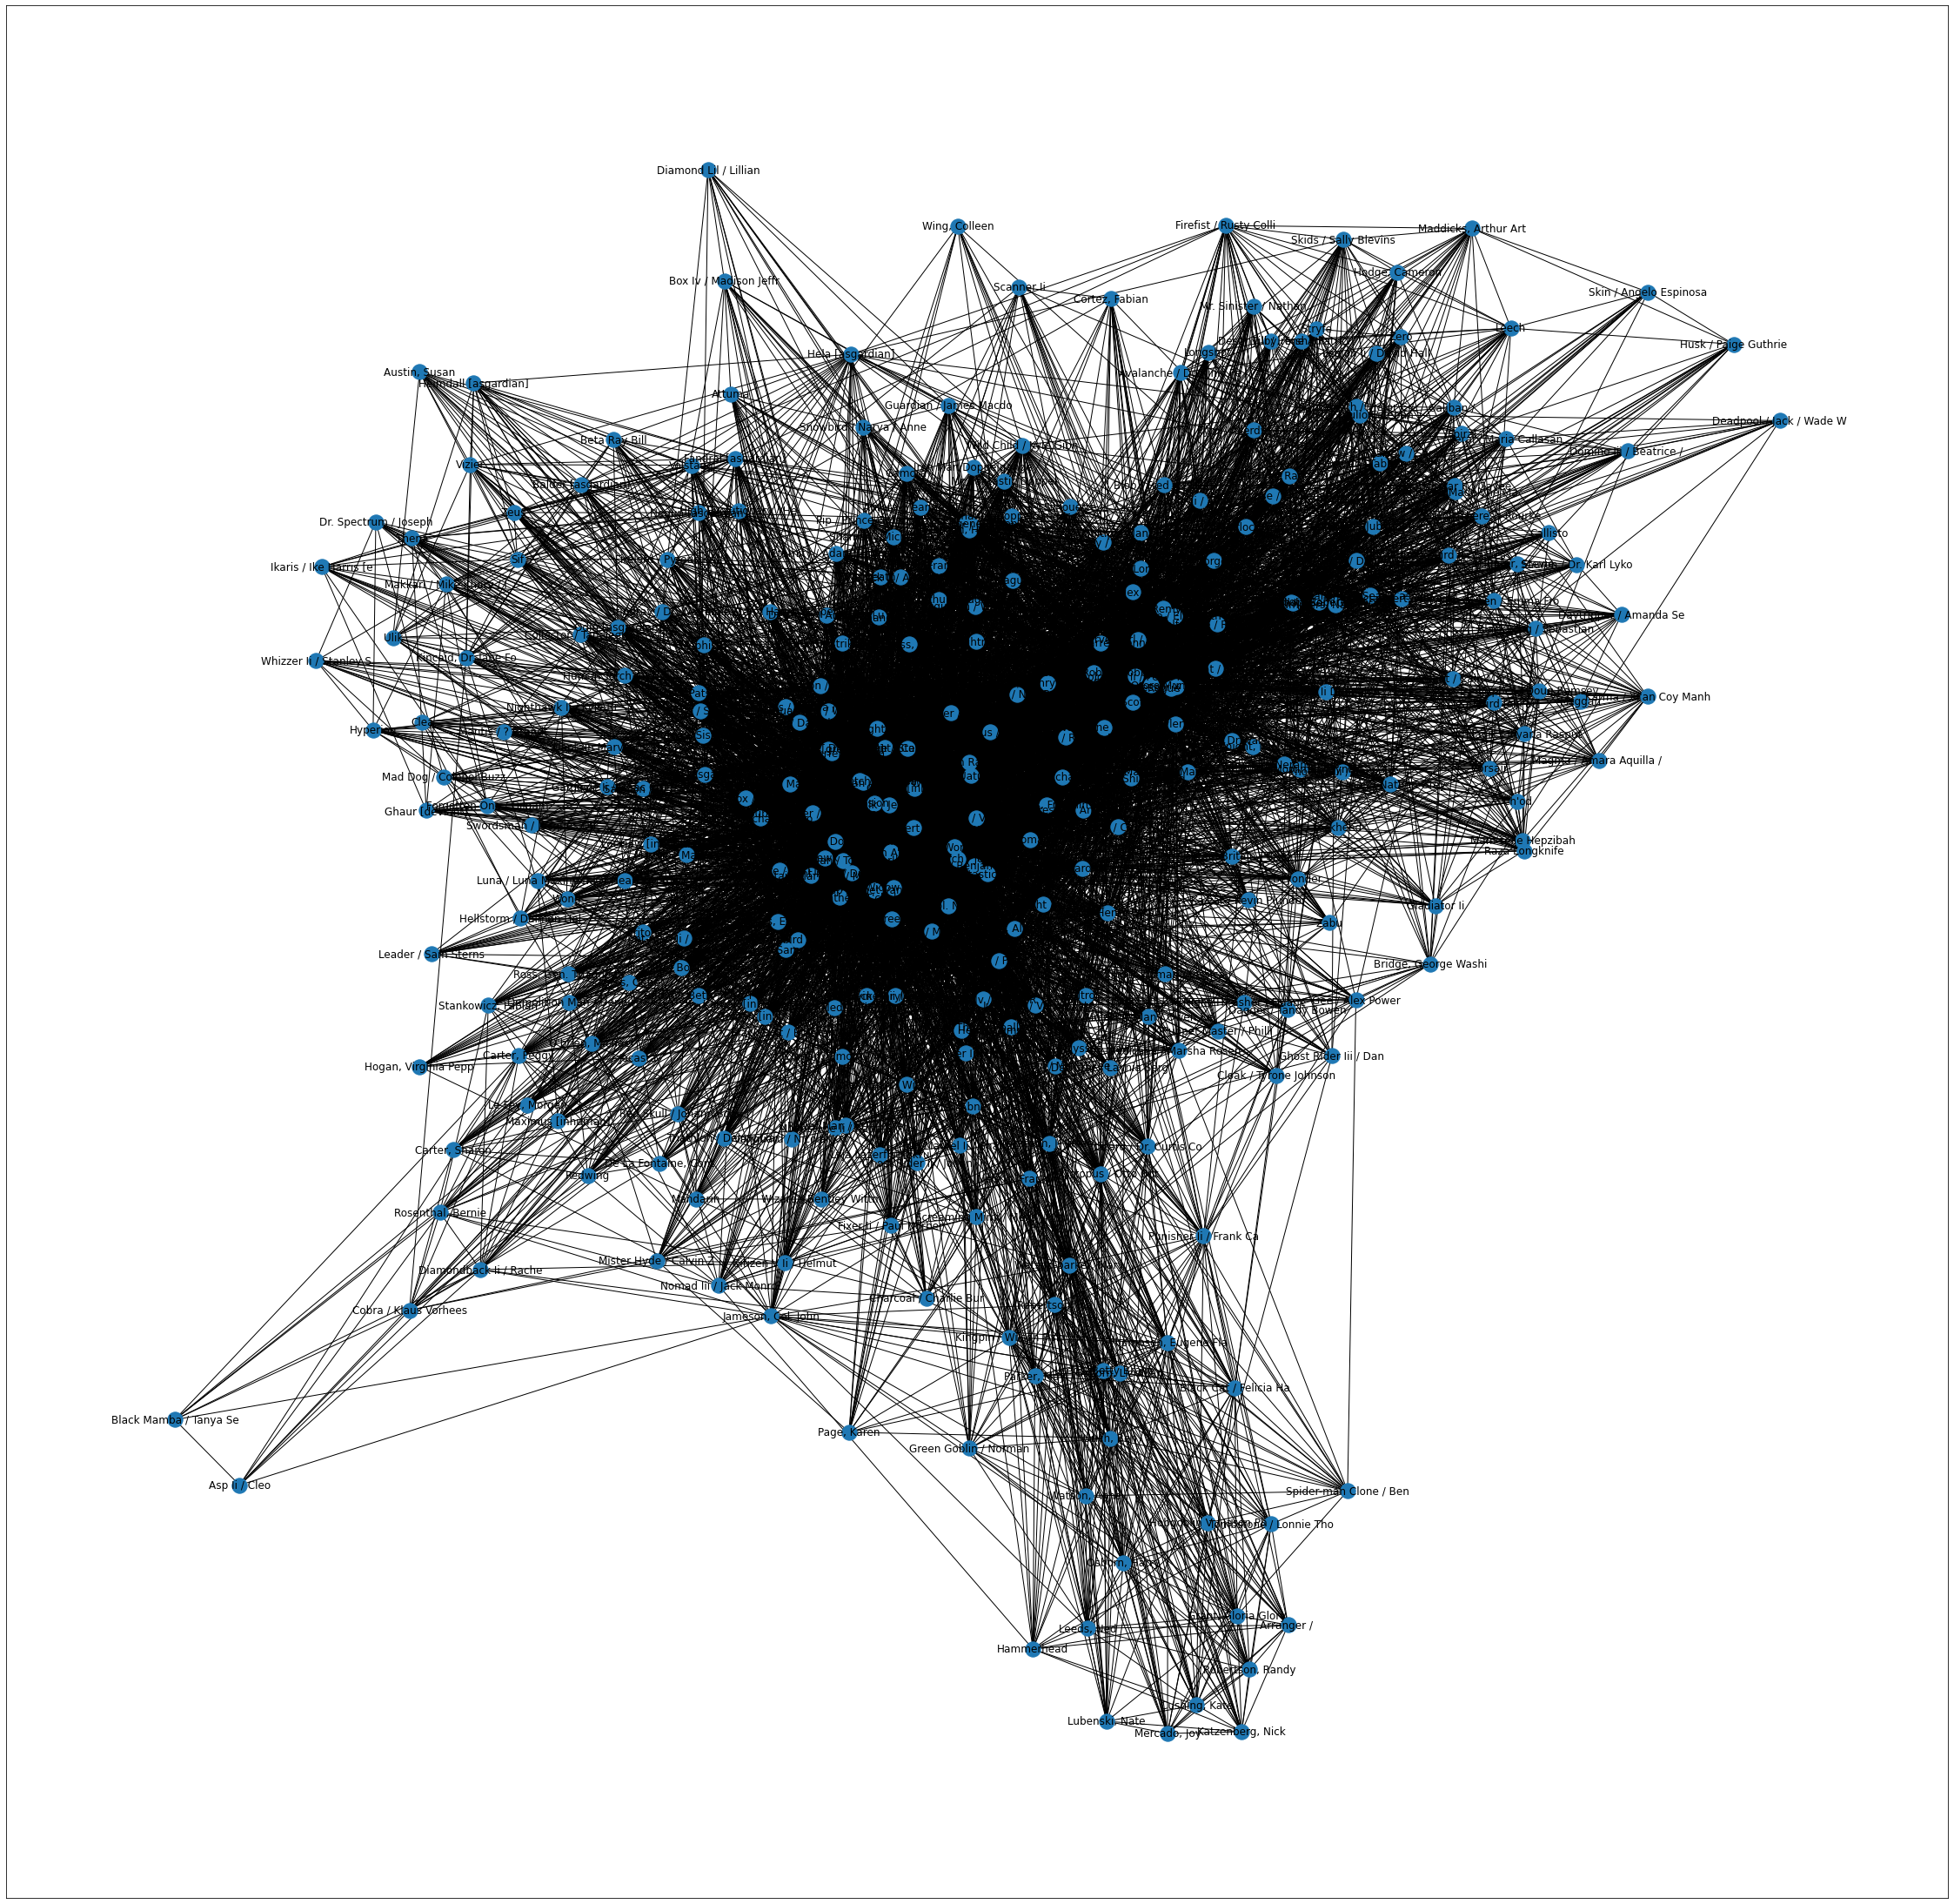

In [19]:
### Put your code here
import matplotlib.pyplot as plt
import networkx as nx


G = nx.Graph()

for index, row in marvel.iterrows():
    G.add_edge(row['Source'], row['Target'])

plt.figure(figsize=(40, 40))
nx.draw_networkx(G)

#come back


We will now visualize the graph.

&#9989; **Question 2.3 (5 points)**: Create a large figure for drawing the graph using something like `plt.figure(figsize=(20,20))`. Then, draw the graph using `networkx`. Make sure that when drawing your graph, you accomplish the following:
1. The `"Captain America"` node should have a unique node color, he's the most connected character,
2. The characters `"Asp Ii / Cleo"` and `"Black Mamba / Tanya Se"` should have the same color as each other, but it should be _different_ color from that of Captain America.
3. All of the other characters should have a third, different color.

To recap, you should have **three** different colors in your graph, one for Captain America, one for Asp and Black Mamba, and one for all of the other characters.

(Partial credit if you generate the graph but the colors are not set as described.)

**Note**: this will be a very crowded graph because it's a complex, heavily-interconnected network, but you should see that Captain America is somewhere in the middle of the graph and that Asp and Black Mamba are connected to each other and on the outskirts of the graph.

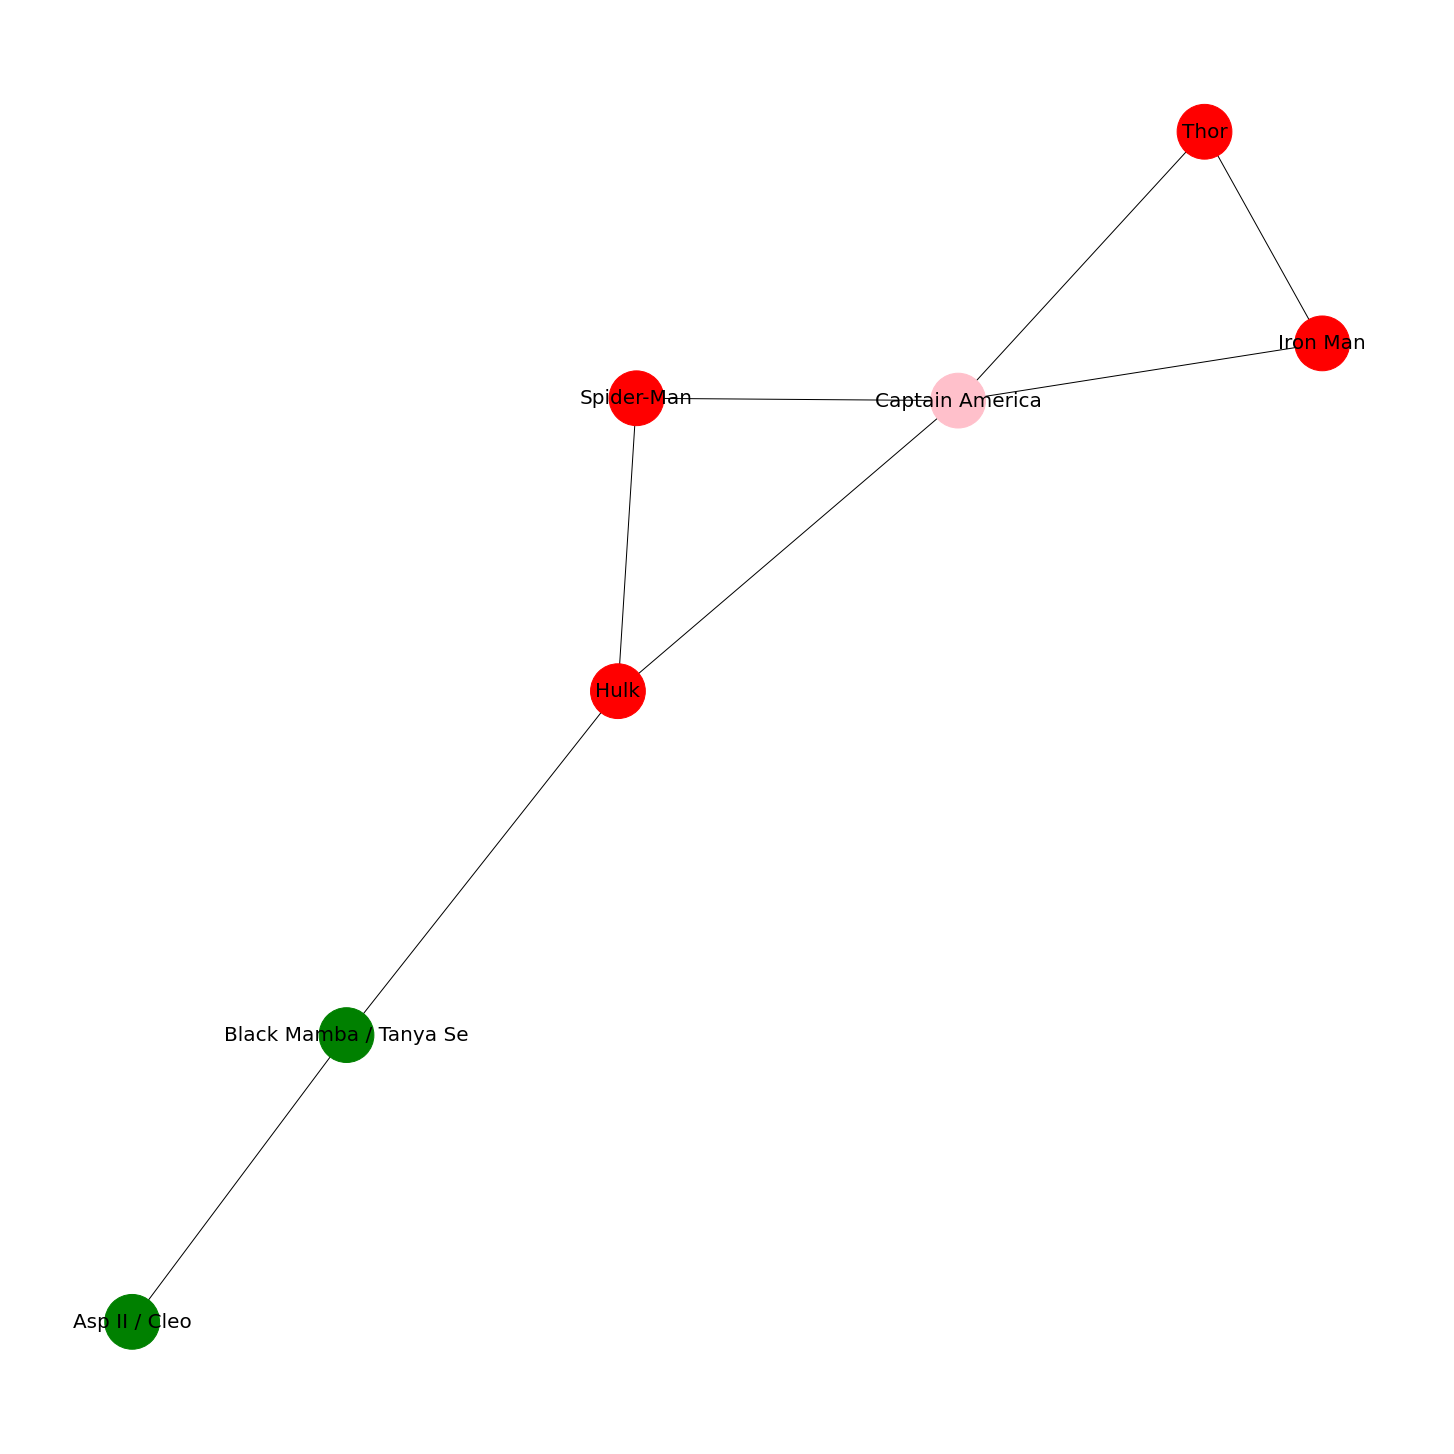

In [6]:
#code
import networkx as nx

G = nx.Graph()
characters = ["Captain America", "Asp II / Cleo", "Black Mamba / Tanya Se", "Iron Man", "Thor", "Hulk", "Spider-Man"]

edges = [("Captain America", "Iron Man"), ("Captain America", "Thor"), 
         ("Captain America", "Hulk"), ("Captain America", "Spider-Man"),
         ("Asp II / Cleo", "Black Mamba / Tanya Se"), ("Black Mamba / Tanya Se", "Hulk"),
         ("Iron Man", "Thor"), ("Spider-Man", "Hulk")]

G.add_nodes_from(characters)
G.add_edges_from(edges)

color_map = []
for node in G:
    if node == "Captain America":
        color_map.append('pink')  #captain america pink
    elif node in ["Asp II / Cleo", "Black Mamba / Tanya Se"]:
        color_map.append('green') # asp and black mamba green 
    else:
        color_map.append('red')   #every other character red

plt.figure(figsize=(20, 20))

nx.draw(G, with_labels=True, node_color=color_map, node_size=3000, font_size=20)
plt.show()





Now, using **only the graph you created (not the initial row-based data)**, answer the following questions.

You may find it useful to review the "Methods" section of the [networkx Graph documentation](https://networkx.org/documentation/stable/reference/classes/graph.html#methods).

&#9989; **Question 2.4 (1 point)** What is the number of characters appearing in total?

In [14]:
### Put your code here

num_characters = G.number_of_nodes()
num_characters


327

&#9989; **Question 2.5 (1 point)** With how many characters does `"Vision"` co-appear?

In [16]:
### Put your code here

if "Vision" in G:
    vision_coappearances = len(G["Vision"])
else:
    vision_coappearances = 0

vision_coappearances



213

&#9989; **Question 2.6 (1 point)** True or False?: `"Hyperion"` co-appears with `"Hammerhead"`. Use a graph method to determine this. If you want to verify that you're right, you could create a new visualization of your graph and give these two characters unique colors.

In [17]:
### Put your code here

hyperion_hammerhead_coappearance = G.has_edge("Hyperion", "Hammerhead")
hyperion_hammerhead_coappearance





False

&#9989; **Question 2.7 (1 point)** Using the relevant `networkx` function (consult the documentation/internet resources), **find the "shortest path" between `"Sif"` and `"Callisto"`**. The two characters do not appear together, but you should be able to determine a set of nodes to "traverse" to get from one character to the other.

In [22]:
### Put your code here

# if "Sif"  and  "Callisto":
#     try:
#         shortest_path_there = nx.shortest_path(G, source="Sif", target="Callisto")
#     except nx.NetworkXNoPath:
#         shortest_path = "No path found"
# else:
#     shortest_path = "One or both characters are not in the graph"

# shortest_path


if "Sif" in G and "Callisto" in G:
    if nx.has_path(G, "Sif", "Callisto"):
        shortest_path = nx.shortest_path(G, source="Sif", target="Callisto")
    else:
        shortest_path = "No path found"
else:
    # One or both characters are not in the graph
    shortest_path = "One or both characters are not in the graph"

shortest_path




['Sif', 'Iron Man / Tony Stark', 'Rogue  / ', 'Callisto']

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 2**", and push the changes to GitHub.

---

---
## Part 3: Perform a regression analysis on data (16 points)

We will now be looking at a dataset of diamonds of varying properties and qualities and their prices. You can find the dataset to download here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/diamonds.csv`

&#9989; **Question 3.1 (2 points)**: To get started, **download the `diamonds.csv` file and place it in the same directory as your notebook**, then **read in the `diamonds.csv` dataset** and finally **display the first few rows of the data**. You can use **Pandas** for this task or any other Python tool you prefer.

In [ ]:
### Put your code here

You should see a list of diamonds with several different pieces of information about them, such as the number of carats, the cut, color, clarity, and so on...

You will be trying to predict `price` using linear regression using a subset of the other diamond features.

&#9989; **Question 3.2 (3 points)**: Create two arrays and/or dataframes from the data you just loaded, one of them called `labels`, the other one called `features`. `labels` should **only** include the `price` column, while `features` should include **just the following columns**:
* `carat`
* `depth`
* `table`
* `x`
* `y`
* `z`

You should be able to create a new dataframe with only these columns or drop all the columns that should *not* be in your `features` dataframe.

In [ ]:
### Put your code here

Now that we have the labels and features to fit, we will use the `statsmodels` `OLS` model to fit it. 

&#9989; **Question 3.3 (2 point)**: Before we do this, **add a column of constants (set to 1.0) to the `features`**. There is a `statsmodel` function you saw in class that allows you to do that. Call this new data structure `features_const`. (If you cannot figure this out, you can use `features` instead of `features_const` for the next questions.) Print/display `features_const` to make sure the new column exists.

In [ ]:
### Put your code here

Now you will perform the actual fit.

&#9989; **Question 3.4 (3 points)**: Using `statsmodels` `OLS`, perform a fit using `labels` (containing `price`) as the quantity to fit (y) and fit it to the `features_const` (X). Once the fit is done print the fit `summary()`.

In [ ]:
### Put your code here

&#9989; **Question 3.5 (2 points)**: Which feature would you say contributes the least to the fit result and/or is the least important? Make sure to justify your answer with a sentence or two. If you were unable to successfully add the constant term and the results do not indicate a least important feature, explain why that might be. Then for Question 3.6, just choose a feature to remove.

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

&#9989; **Question 3.6 (2 points)**: Now **run the fit again, but with the "least important" feature you identified in Q3.5 removed**. Make sure your new features still include the `constant` column (unless that happens to be the least important feature). **Print the fit `summary()`.**

In [ ]:
### Put your code here

&#9989; **Question 3.7 (2 points)**: Comment on the difference in fit quality between the two fits you just performed. Is one much better or worse than the other? Is the difference what you expected? Explain how you judged the quality given the fit statistics you printed.

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", and push the changes to GitHub.

---

---
## Part 4: Perform a support vector machine (SVM) classification on data (16 points)

For this part of the exam, you will be using a dataset that is based on some precise measurements of a variety of dry beans to try and classify beans by their type. You can download the dataset from here:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/Dry_Bean_Dataset.csv`

&#9989; **Question 4.1 (1 point)**: **Load the `Dry_Bean_Dataset.csv`.** Display the first few lines of the loaded dataset.

In [ ]:
### Put your code here

We will now try to perform **classification**. We will try to see if we can classify the bean type using the properties that are given. We will need perform a train-test split on the data first.

&#9989; **Question 4.2 (3 points)**: **Create two data structures** (e.g. dataframes) from your table: one called `labels` containing **only** the values from the `Class` column and one called `features` containing **everything but** the `Class` column.

Then, perform a **train-test-split** using functions we used in class. Use a `train_size` of `0.75` and `random_state` of `42`. You should now have a training and a testing set with "labels" and "features" each.

**Syntax Note:** if you are using Pandas dataframes for creating and storing your `labels` variable, you will need to make sure to use `['Class']` for the single-column selection, not `[['Class']]` as the latter will create a list of single-entry lists that the classification code you are going to use later will not like! If you run into and issue and you think it might be related to this, notify your instructor.

In [ ]:
### Put your code here

&#9989; **Question 4.3 (6 points)**: **Fit an SVM classifier (using the `sklearn` `SVC` class) to the dataset.** Use a `linear` kernel and set the hyper-parameter `C=1.0`. Then **fit your *training* set** and use the resulting fit to **predict your the *testing* set** so you get predicted labels for the testing set. Finally, print the fit statistics using `confusion_matrix` and `classification_report` (if you prefer the visual plot version of the confusion matrix, you can use `ConfusionMatrixDisplay` from `sklearn.metrics` instead).

In [ ]:
### Put your code here

&#9989; **Question 4.4 (3 points)**: Interpret the output of your classification report and the confusion matrix by answering these three questions (provide at least 1 or 2 sentences each for full credit): 
* Explain in a few sentences what you observe in the confusion matrix. 
* Would you consider this a good or a bad classifier?
* Which quantity from the classification report did you use to make this judgement?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

&#9989; **Question 4.5 (3 points)**: We have been using machine learning "jargon" in this section and in class. In a few sentences each explain the following concepts:
* What are "labels" and "features"?
* Why do we need "training sets" and "testing sets"?

<font size=+3>&#9998;</font> Do This - Erase the contents of this cell an put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 4**", and push the changes to GitHub.

---

## You're done! Congrats on finishing your CMSE 202 Final!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.